In [1]:
# import needed modules
import numpy as np                      # general computation
import librosa                          # audio signal processing, feature extraction
from librosa import display             # plot the spectrogram
import matplotlib.pyplot as plt         # general plotting

In [2]:
def compute_spectrogram(audiofile, no_mels, fft_size, hop_size):
    [y, sr] = librosa.core.load(audiofile, sr=None, mono=True)
    
    # downsampling?
    #y = librosa.resample(y=y,orig_sr=sr,target_sr=11050)
    len = sr * 30;
    # get audio file for desired duration
    y = y[0:len]

    # get options for computing spectrogram
    mels = no_mels                      # frequency resolution
    fft = fft_size                      # fft length
    hop = hop_size                      # hop size

    # Mel spectrogram for the file, overlap=50%
    S = librosa.feature.melspectrogram(y, sr, n_fft=fft, n_mels=mels, hop_length=hop)
    # log-compressed version
    S = librosa.power_to_db(S, ref=np.max)

    # get spectrogram matrix dimensions (to be used in the convnet)
    dims = S.shape

    # plot the spectrogram

    plt.figure(figsize=[12, 4])
    librosa.display.specshow(S, sr=sr, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()

    return S, dims

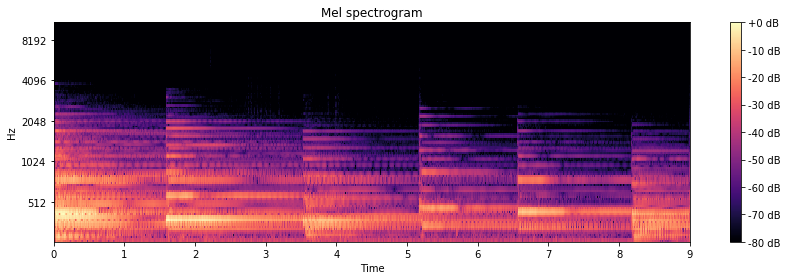

S dimensions: (128, 776)
776


In [4]:
# general parameters
INPUT_FILE = 'samples/Jarrett_Vienna_cut.wav'           # input file for feature evaluation
NO_MELS = 128                                           # no. of mel bins
FFT_SIZE = 1024                                         # size of FFT
HOP_SIZE = 512                                          # hop size (overlap)
DURATION = 2.90                                         # segment duration (sec)


[S, dims] = compute_spectrogram(
            audiofile=INPUT_FILE,
            no_mels=NO_MELS,
            fft_size=FFT_SIZE,
            hop_size=HOP_SIZE,
        )

print('S dimensions:', S.shape)